**Question 3**

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def generate_n_circles(M, N, border, n, r1, r2):

    circle_dimensions = []
    j=0

    while j<2*n and len(circle_dimensions) != n:
        # Generate random center coordinates and radius values
        x_coordinate = np.random.randint(border, M + border)
        y_coordinate = np.random.randint(border, N + border)
        radius = np.random.randint(r1, r2+1)

        # Initially appending these dimensions to circle_dimension
        circle_dimensions.append((x_coordinate, y_coordinate, radius))


        # Check if current circle overlaps with existing circles
        for i in range(len(circle_dimensions)-1):
            dist = np.sqrt((x_coordinate-circle_dimensions[i][0])**2 + (y_coordinate-circle_dimensions[i][1])**2)
            if dist < radius+circle_dimensions[i][2]:
                # If for any circle current circle overlaps, then pop the currently added circle
                circle_dimensions.pop()
                break
        j += 1

    return circle_dimensions

In [ ]:
def draw_circles(img, circle_dimensions):
    for dimension in circle_dimensions:
        for x in range(img.shape[1]):
            for y in range(img.shape[0]):
                if np.sqrt((x - dimension[0]) ** 2 + (y - dimension[1]) ** 2) < dimension[2]:
                    img[y, x] = 255

    return img

In [ ]:
def fill_image_with_random_intensity_values(img, M, N, border, Vf, Vb):
    for i in range(border, M + border):
        for j in range(border , N + border):
            if img[i,j] == 255 and Vf is not None:
                img[i,j] = np.random.choice(Vf)
            elif img[i,j] == 0 and Vb is not None:
                img[i,j] = np.random.choice(Vb)
                
    return img

In [ ]:
def draw_border(img, M, N, border):
    for i in range(0,border):
        for j in range(0,M+2*border):
            img[i,j]=0
    for i in range(N+border,N+2*border):
        for j in range(0,M+2*border):
            img[i,j]=0
    for i in range(border,N+border):
        for j in range(0,border):
            img[i,j]=0
        for j in range(M+border,M+2*border):
            img[i,j]=0  

    return img

In [22]:
def create_image_with_random_circles(M, N, border, n, r1, r2, Vf=None, Vb=None):

    # Create n non-overlapping discs
    circle_dimensions = generate_n_circles(M, N, border, n, r1, r2)

    # If we've tried 2*n times and still haven't found n non-overlapping discs,
    # double the image size and try again
    while len(circle_dimensions)!=n:
        print("Recursively called for image with size ",M*2," X ",N*2)
        return create_image_with_random_circles(M*2, N*2, border, n, r1, r2, Vf, Vb)

    # Creating an image of size (M + 2 * border)X(N + 2 * border) with all cells black
    img = np.zeros((M + 2 * border, N + 2 * border), dtype=np.uint8)

    # Drawing circles on image, circles are initially coloured in white
    img = draw_circles(img, circle_dimensions)

    # Filling the image with random intensity values distributed over Vf for circles and Vb for background
    img = fill_image_with_random_intensity_values(img, M, N, border, Vf, Vb)       

    # Creating border for the image
    img = draw_border(img, M, N, border)


    print("Got output for ",M," X ",N)
    return img 


Recursively called for image with size  400  X  400
Recursively called for image with size  800  X  800
Recursively called for image with size  1600  X  1600
Got output for  1600  X  1600


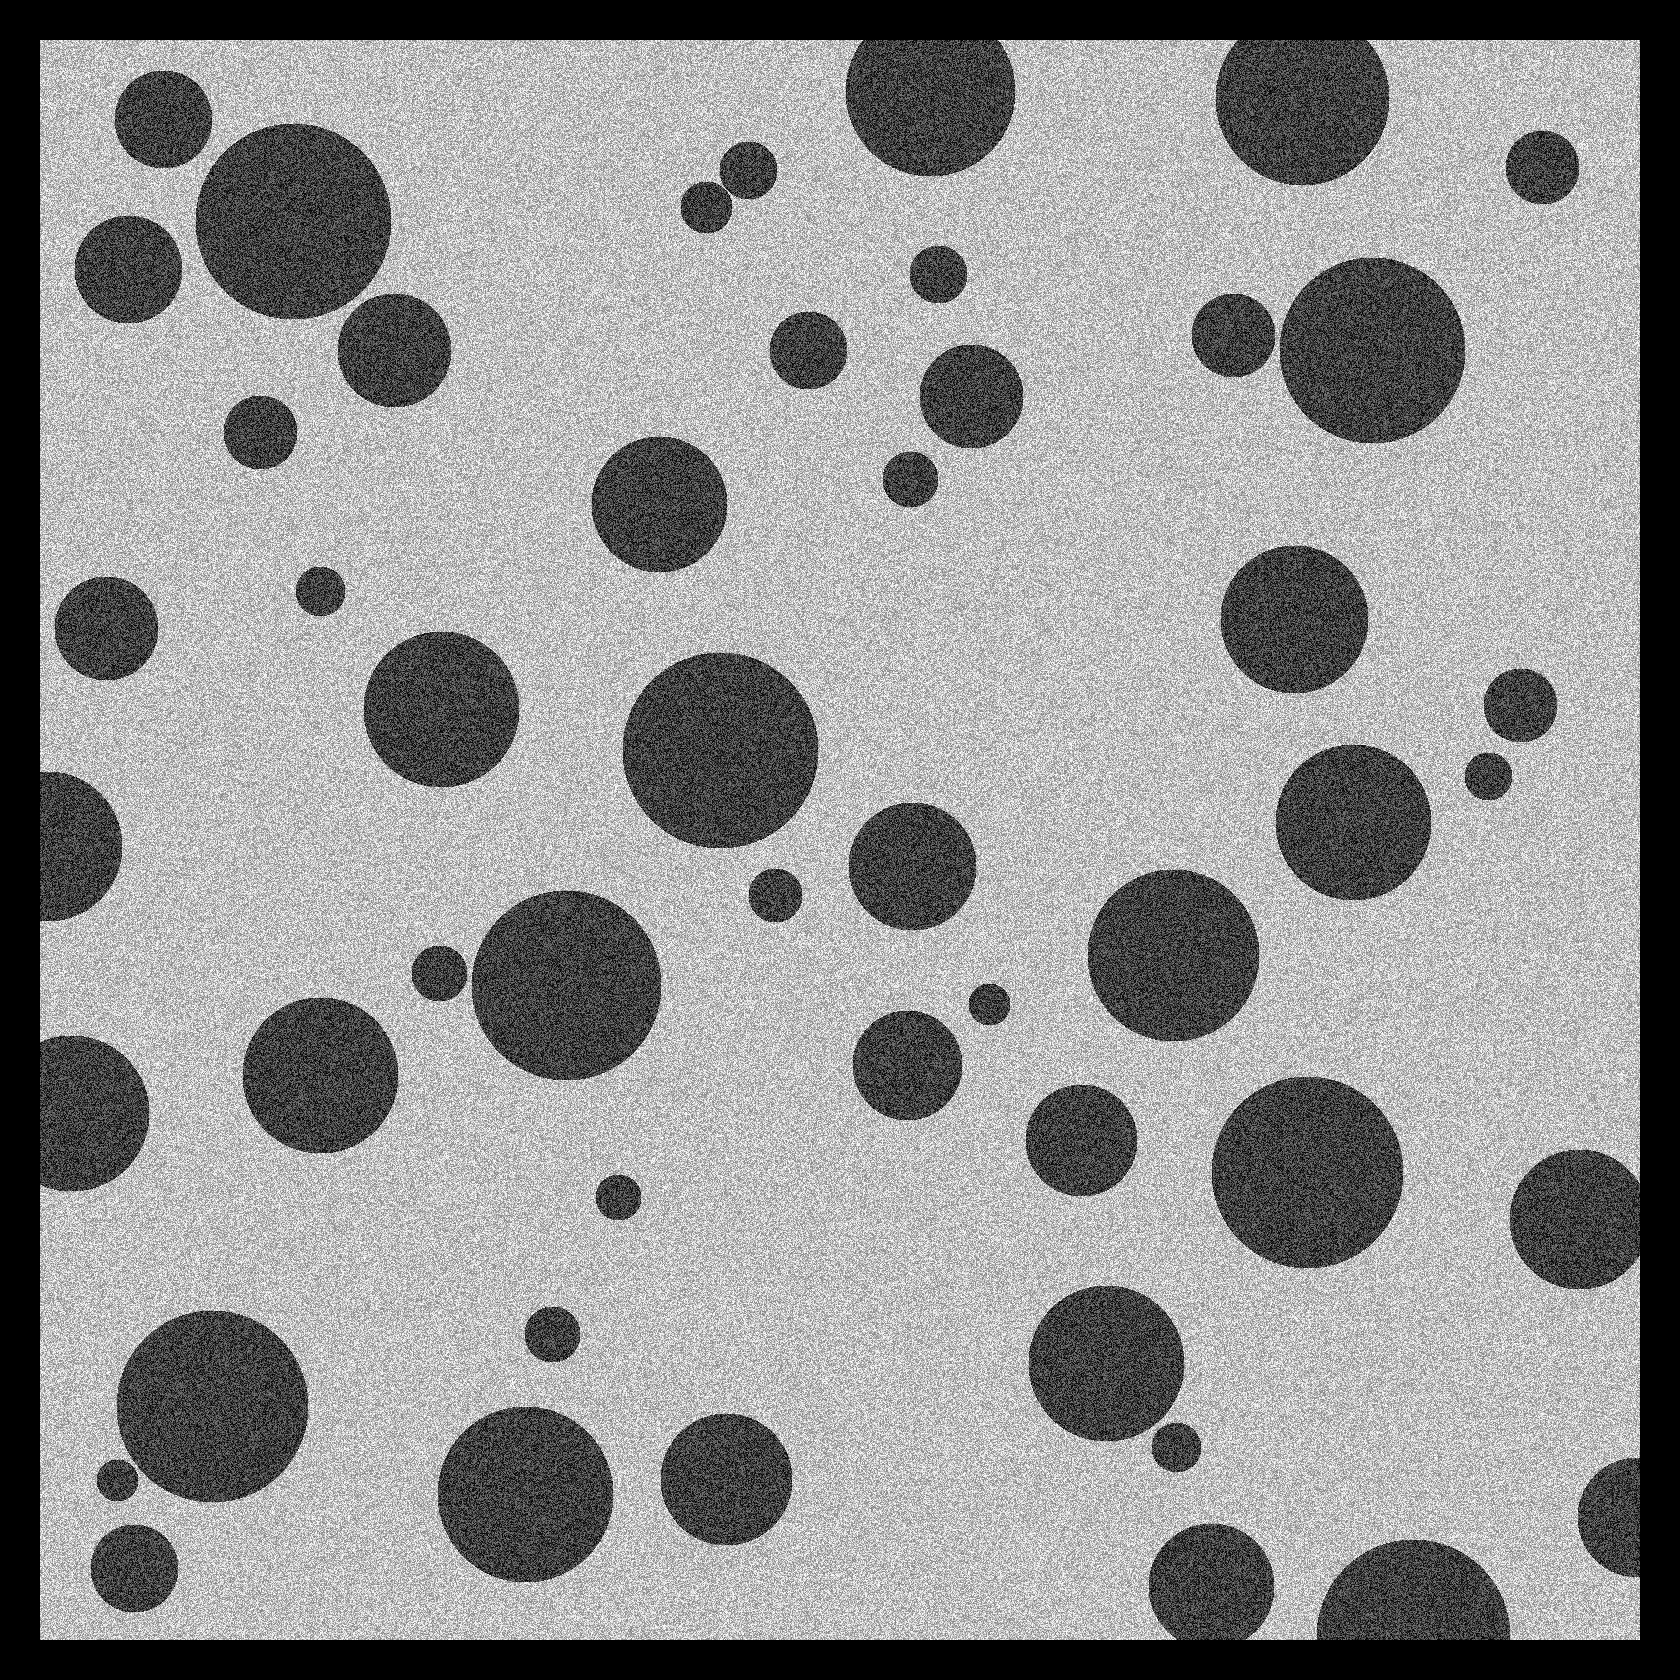

True

In [24]:
# Define input parameters
M = 200
N = 200
border = 40
n = 50
r1 = 20
r2 = 100
Vf = np.arange(0, 128, dtype=np.uint8)
Vb = np.arange(129, 256, 2, dtype=np.uint8)

# Create image
img = create_image_with_random_circles(M, N, border, n, r1, r2, Vf, Vb)

# Display and save image
cv2_imshow(img)
cv2.waitKey(0)
cv2.imwrite('output.png', img)
